# Conditional Expected Drawdown Demo

#### Start by importing modules and the CED function

In [8]:
import pandas as pd
import numpy as np 
import yfinance as yf
import requests
import matplotlib.pyplot as plt

from conditional_drawdown import drawdown as dd

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.grid'] = True

#### Download some data

In [3]:
tickers = ["ES=F", "GLD"]
end_date = "2024-12-31"

headers = {
    "Referer": "https://www.solactive.com/indices/?index=DE000SL0K6D2",
}

url = "https://www.solactive.com/indices/?indexhistory=DE000SL0K6D2&indexhistorytype=max"
response = requests.get(url, headers=headers)

data = yf.download(tickers, end=end_date)["Adj Close"]
returns = data.pct_change(fill_method=None).dropna()

df = pd.DataFrame(response.json())
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

wifey_ms_series = df.set_index('date')['value']
wifey_ms_returns = wifey_ms_series.pct_change().dropna()


[*********************100%***********************]  2 of 2 completed


In [6]:
returns = data.pct_change(fill_method=None).dropna()

es_ced = dd.CED(returns['ES=F'].values)
gld_ced = dd.CED(returns['GLD'].values)

print(f"S&P Futures CED: {es_ced:.4f}")
print(f"Gold ETF CED: {gld_ced:.4f}")

# Portfolio example
portfolio_returns = (returns * 0.5).sum(axis=1)
portfolio_ced = dd.CED(portfolio_returns.values)
print(f"Portfolio CED: {portfolio_ced:.4f}")

S&P Futures CED: 0.1300
Gold ETF CED: 0.1064
Portfolio CED: 0.0858


----
## CED Time Series

Here we take daily returns for Wifey Alpha's multi-strategy index

CED follows a spike-then-smooth-out pattern over time.

This data essentially means that during the worst 10% of rolling 21-day periods on Wifey Alpha's multi-strategy index, the average maximum drawdown is around 4.5% to 5% for most of the time.

<Axes: xlabel='date'>

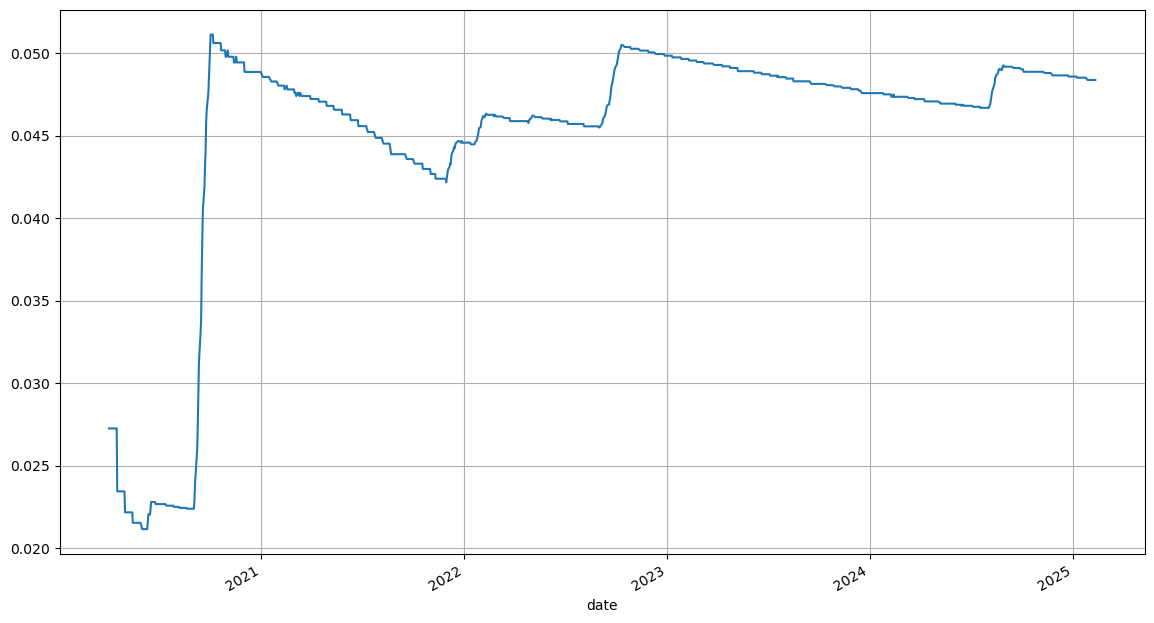

In [9]:
hist_ced = dd.series_CED(wifey_ms_returns.iloc[42:])
hist_ced.plot()